In [1]:
!pip install seaborn

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets

In [17]:
from sklearn.preprocessing import StandardScaler

In [30]:
from sklearn.metrics import silhouette_score

In [18]:
import time

In [19]:
from datetime import date

In [51]:
from sklearn.decomposition import PCA

In [33]:
redwine = pd.read_csv(r'/Users/sugab/Downloads/Compressed/winequality-red.csv')

In [34]:
redwine.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

In [35]:
redwine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [23]:
redwine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

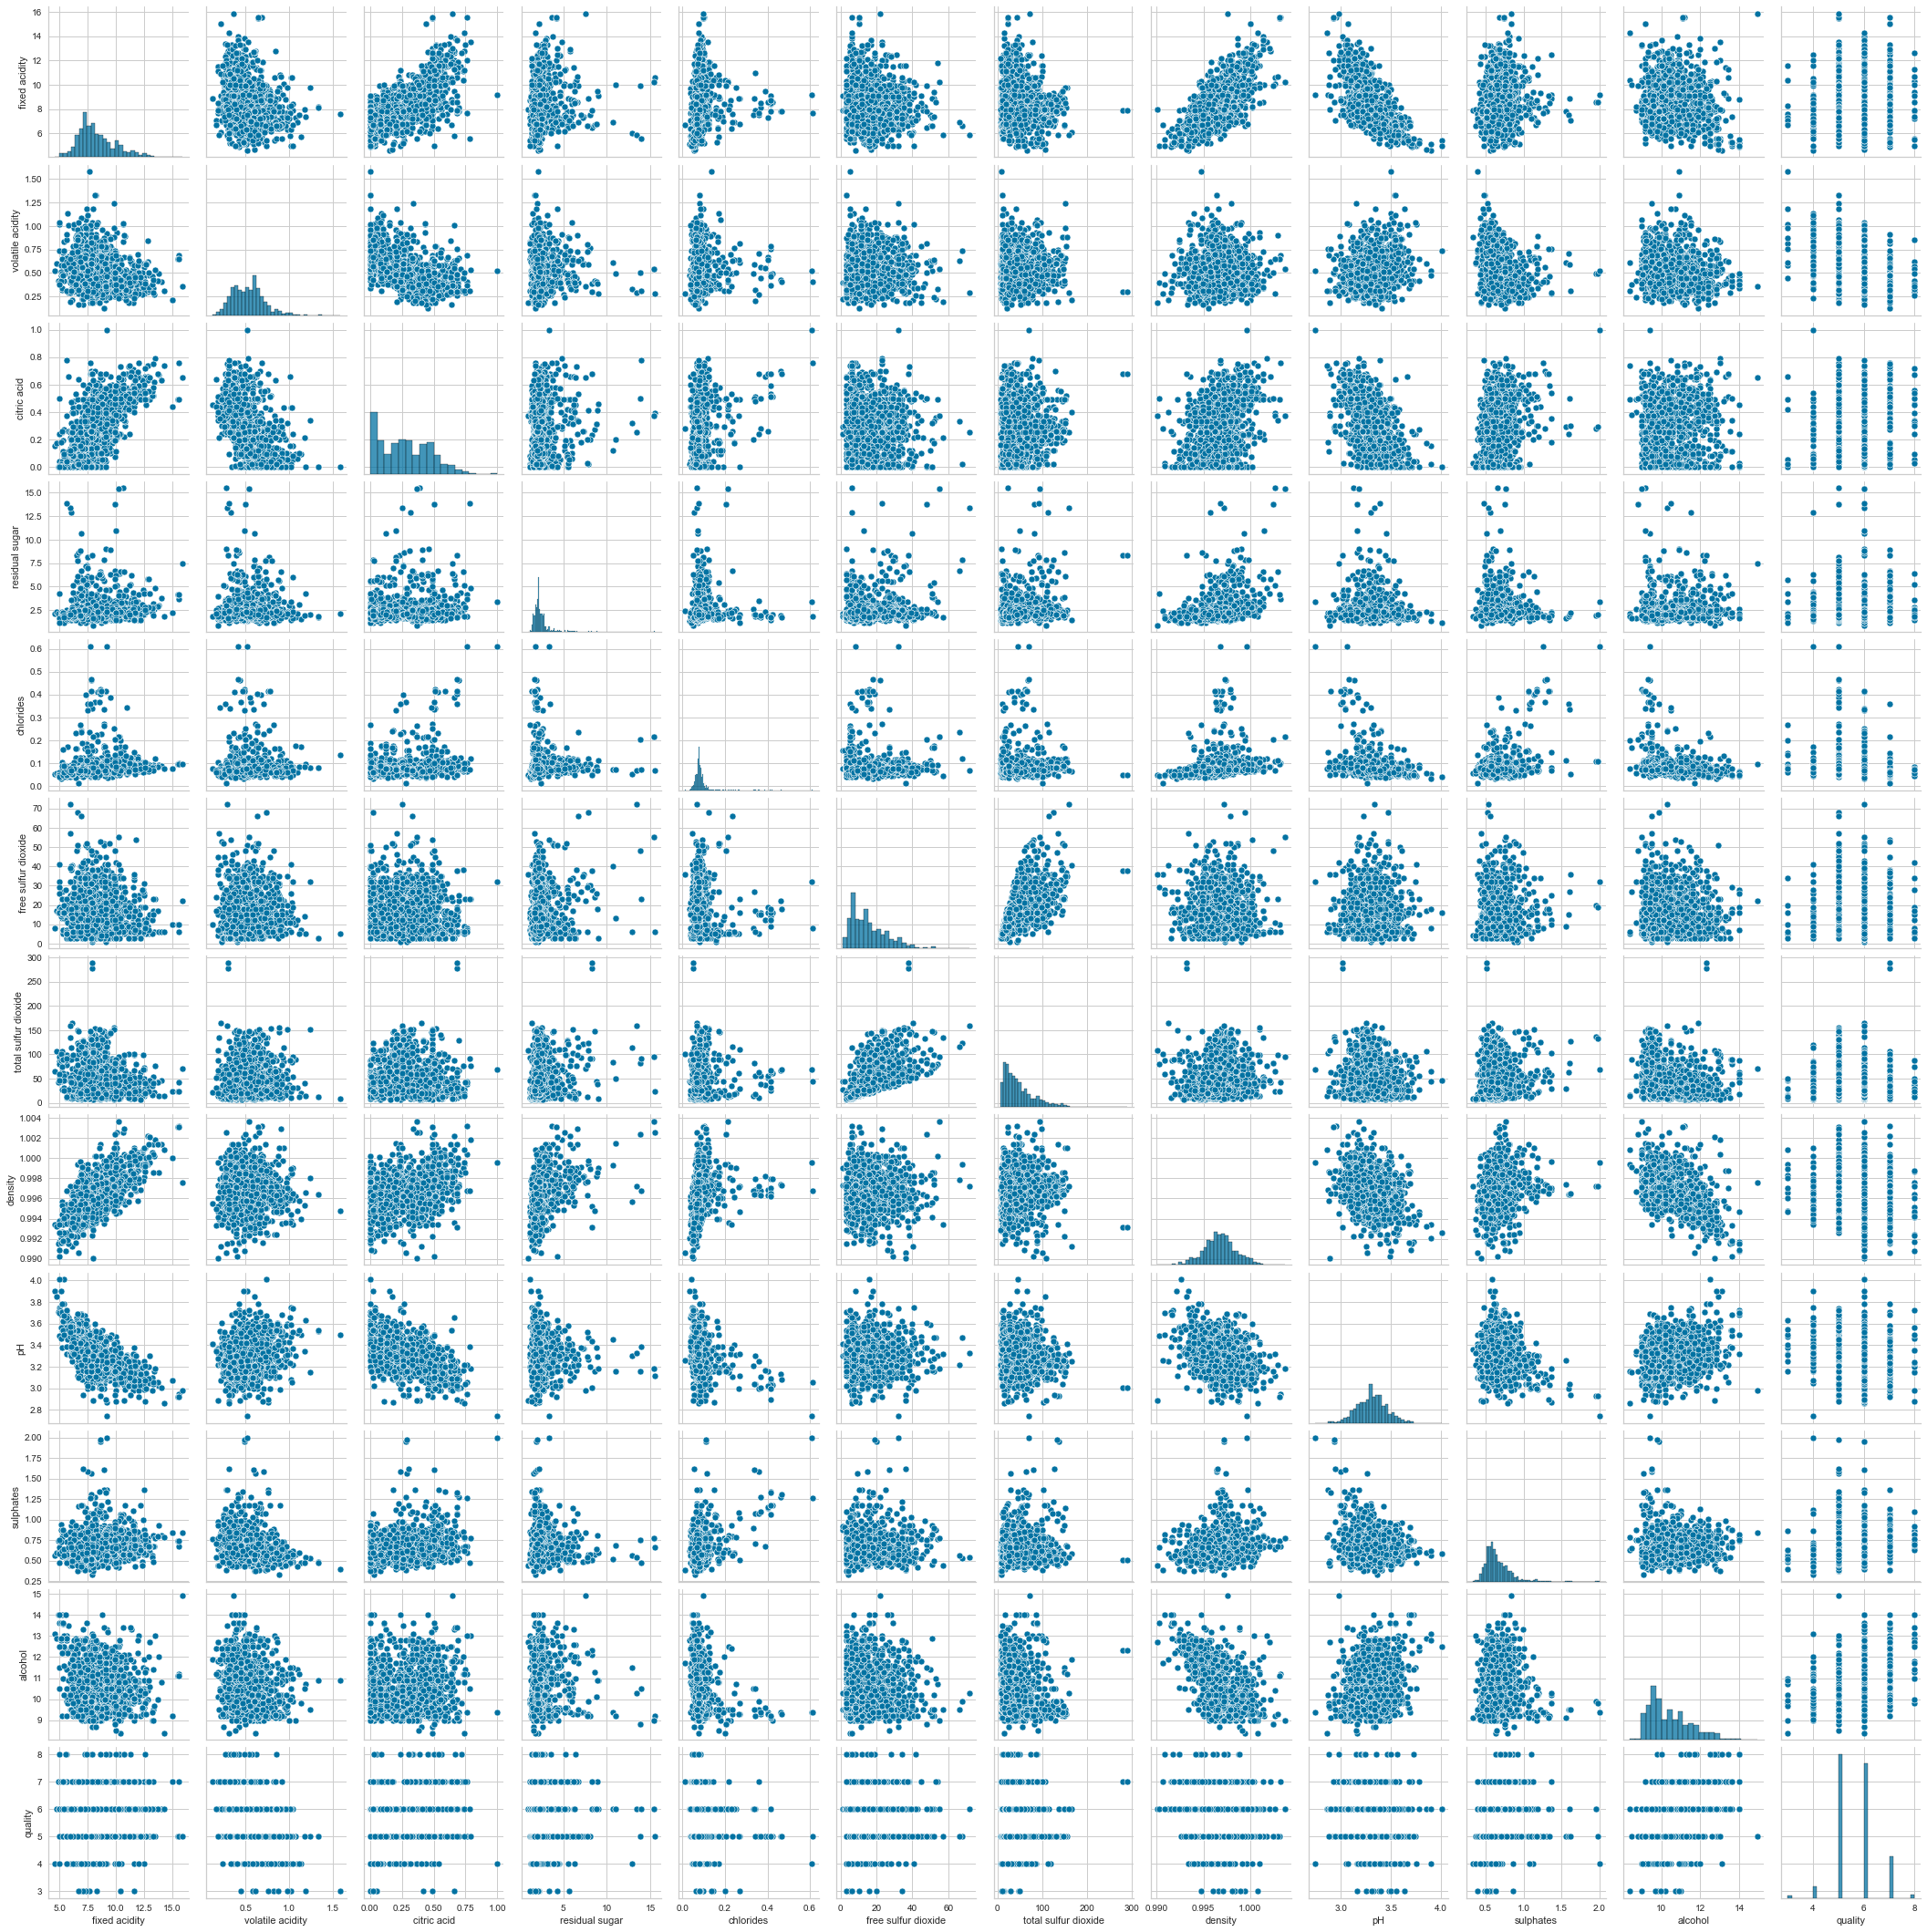

<Figure size 576x396 with 0 Axes>

In [24]:
visual = sns.pairplot(redwine)
plt.show()
plt.savefig('/Users/sugab/Downloads/', transparent=False)
print(visual)

Text(0.5, 1.0, 'Correlation between the columns')

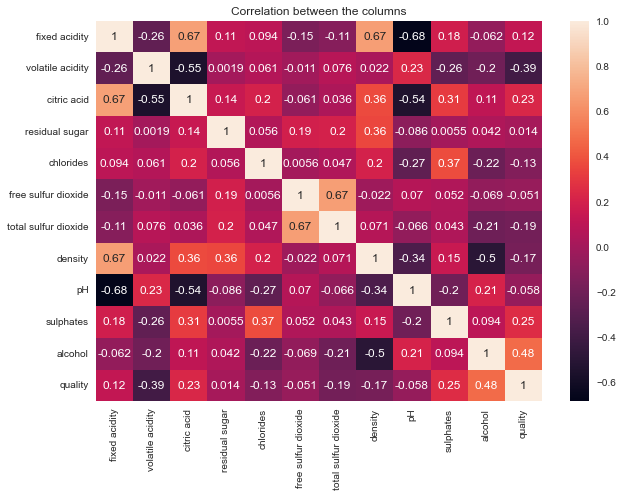

In [25]:
plt.figure(figsize=(10,7))
sns.heatmap(redwine.corr(), annot=True)
plt.title('Correlation between the columns')

In [36]:
# set the x and y and array
wineset=redwine #.drop('volatile acidity',axis=1) #have done the drop
#scaler = StandardScaler()
#scaler.fit(wineset)
#winesetscale=scaler.transform(wineset)


In [37]:
wineset.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

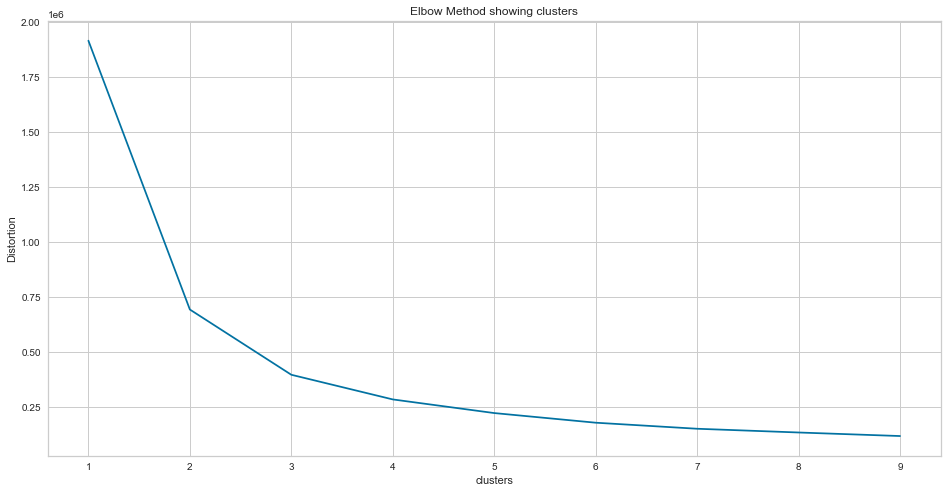

In [38]:
distortion = []
for i in range(1,10):
    kmeans = KMeans(       n_clusters=i, init="k-means++",
        n_init=10,
        tol=1e-04, random_state=42
)
    kmeans.fit(wineset)
    distortion.append(kmeans.inertia_)
f3, ax = plt.subplots(figsize=(16, 8))
plt.plot(range(1,10),distortion)
plt.title('Elbow Method showing clusters')
plt.xlabel('clusters')
plt.ylabel('Distortion')
plt.show()

In [29]:
!pip install yellowbrick

     |████████████████████████████████| 282 kB 2.1 MB/s eta 0:00:01


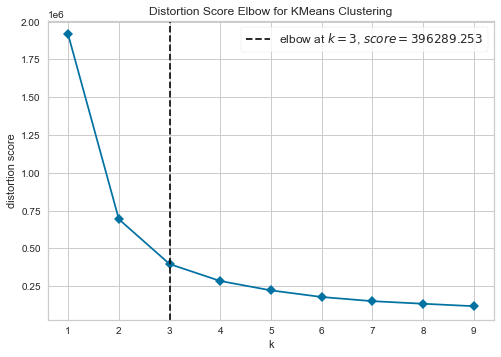

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [40]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model,k=(1,10),timings=False)
visualizer.fit(wineset)
visualizer.show()

In [41]:
for i in range(2,10):
    kmeans = KMeans(n_clusters=i,max_iter=100)
    kmeans.fit(wineset)
    score = silhouette_score(wineset, kmeans.labels_)
    print("For cluster: {} the silhouette score is: {}".format(i,score))

For cluster: 2 the silhouette score is: 0.6027870469562698
For cluster: 3 the silhouette score is: 0.5184003155845271
For cluster: 4 the silhouette score is: 0.4837593429096737
For cluster: 5 the silhouette score is: 0.4452195060654037
For cluster: 6 the silhouette score is: 0.4462630538577409
For cluster: 7 the silhouette score is: 0.3906581301658681
For cluster: 8 the silhouette score is: 0.3876930347985053
For cluster: 9 the silhouette score is: 0.3823883865487067


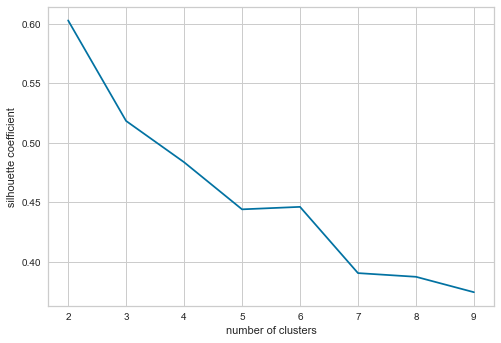

In [50]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(wineset)
    score = silhouette_score(wineset, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.show()

In [52]:
pca = PCA()
X = pca.fit_transform(wineset)

In [56]:
kmeans = KMeans(n_clusters=3, random_state=42)
start_time = time.time()
clusters = kmeans.fit_predict(X)
today = date.today()
print("--- %s seconds ---" % (time.time() - start_time))
labels = kmeans.labels_

--- 0.09700393676757812 seconds ---


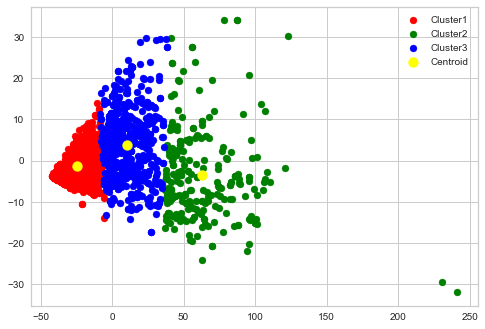

In [61]:
colors = 'red', 'green', 'blue'#,'black','cyan','magenta'
for i in np.unique(clusters):
    plt.scatter(X[clusters==i,0],
               X[clusters==i,1],
               color=colors[i], label='Cluster' + str(i+1))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroid')
plt.legend()
plt.show()
